<a href="https://colab.research.google.com/github/ryskks/usedicom/blob/main/slice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 複数のスライス画像を扱う

In [1]:
# Google Drive のマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 必要なパッケージのインストール
!pip install pydicom
!pip install matplotlib
!pip install -U python-gdcm
!pip install pylibjpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 70.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# 必要モジュールの導入
%matplotlib inline
import matplotlib.pyplot as plt
import pydicom

In [4]:
# DICOM ファイルの読み込み
DIR = "/content/drive/MyDrive/Colab Notebooks/DICOM/EX1/SE1/IMG1"
d = pydicom.read_file(DIR)
# 読み込んだ変数の表示
print(d.Modality)

CT


## まずはスキャノ画像を表示します

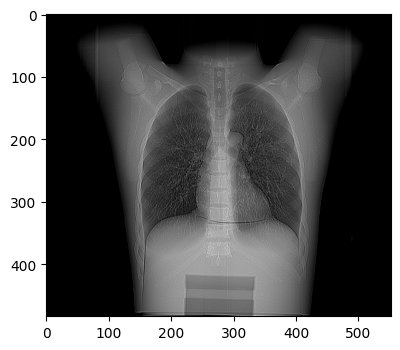

In [6]:
# 画像データを変数に代入
img = d.pixel_array

# ウィンドウレベルと幅の情報を DICOM から取得
wl = d.WindowCenter
ww = d.WindowWidth

max = wl + ww /2
min = wl - ww /2
img = 255 * (img - min) / (max - min)
img[img > 255] = 255
img[img < 0] = 0

# 表示サイズを変更
fig = plt.figure(dpi=100)
plt.imshow(img, cmap='gray')
plt.show()